<a href="https://colab.research.google.com/github/a050e114/AI/blob/master/numpy_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

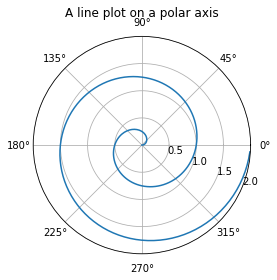

In [2]:
import numpy as np
import matplotlib.pyplot as plt


r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()



/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


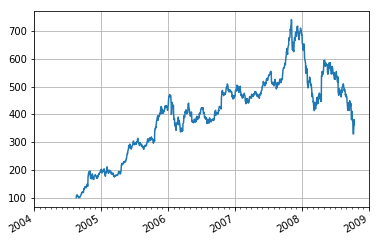

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.
with cbook.get_sample_data('goog.npz') as datafile:
    data = np.load(datafile)['price_data']

fig, ax = plt.subplots()
ax.plot('date', 'adj_close', data=data)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years.
datemin = np.datetime64(data['date'][0], 'Y')
datemax = np.datetime64(data['date'][-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()


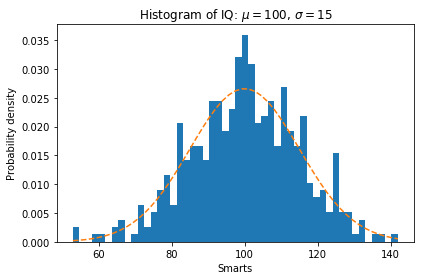

In [4]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()

(-1.9875, 3.2375, -2.8585, 3.4885)

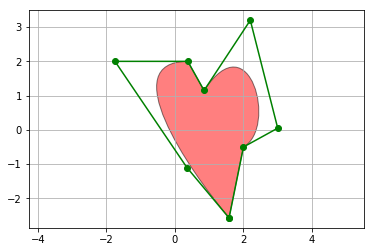

In [5]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')

<StemContainer object of 3 artists>

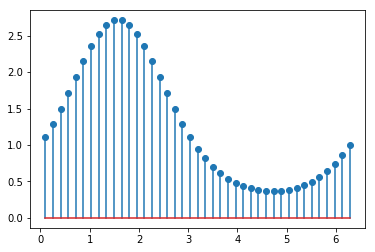

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.1, 2 * np.pi, 41)
y = np.exp(np.sin(x))

plt.stem(x, y)


Text(0.5, 1.0, 'line plot with data points')

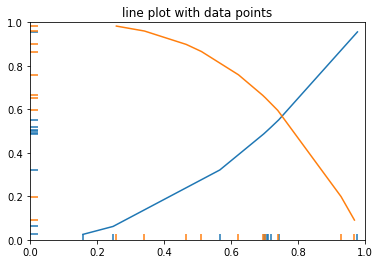

In [12]:
import matplotlib.pyplot as plt
from matplotlib.collections import EventCollection
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

# create random data
xdata = np.random.random([2, 10])

# split the data into two parts
xdata1 = xdata[0, :]
xdata2 = xdata[1, :]

# sort the data so it makes clean curves
xdata1.sort()
xdata2.sort()

# create some y data points
ydata1 = xdata1 ** 2
ydata2 = 1 - xdata2 ** 3

# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(xdata1, ydata1, color='tab:blue')
ax.plot(xdata2, ydata2, color='tab:orange')

# create the events marking the x data points
xevents1 = EventCollection(xdata1, color='tab:blue', linelength=0.05)
xevents2 = EventCollection(xdata2, color='tab:orange', linelength=0.05)

# create the events marking the y data points
yevents1 = EventCollection(ydata1, color='tab:blue', linelength=0.05,
                           orientation='vertical')
yevents2 = EventCollection(ydata2, color='tab:orange', linelength=0.05,
                           orientation='vertical')

# add the events to the axis
ax.add_collection(xevents1)
ax.add_collection(xevents2)
ax.add_collection(yevents1)
ax.add_collection(yevents2)

# set the limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

ax.set_title('line plot with data points')

# display the plot